In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 6,249
training + validation N: 24,234


,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,315,7,-0.587914,AGUGUGCAA
2,validation,27,0,-0.438475,UAAGCUUUU
3,training,130,2,-0.631467,AUGGUCGGG
4,training,552,19,-0.433012,AGGGCAGGA
5,training,151,184,1.094011,AAGGUCCGC
6,training,88,4,-0.241737,CAGGCAAAC
7,training,105,5,-0.238471,GUGGCAAAU
8,validation,14,0,-0.167408,CAUGCAGCU
9,training,170,14,-0.048222,CAAGUCACU


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='rna',
                     gpmap_type='neighbor', 
                     regression_type='GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [4]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 24,234 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.405 sec.


In [5]:
# Fit model to data
model.fit(learning_rate=.001,
          epochs=1000,
          batch_size=200,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1000
92/92 [==============================] - 1s 12ms/step - loss: 287.6119 - I_var: -0.6768 - val_loss: 276.6178 - val_I_var: -0.6073
Epoch 2/1000
92/92 [==============================] - 0s 4ms/step - loss: 268.4307 - I_var: -0.5506 - val_loss: 258.1585 - val_I_var: -0.4787
Epoch 3/1000
92/92 [==============================] - 0s 4ms/step - loss: 248.7932 - I_var: -0.4065 - val_loss: 237.9084 - val_I_var: -0.3366
Epoch 4/1000
92/92 [==============================] - 0s 4ms/step - loss: 229.7331 - I_var: -0.2704 - val_loss: 221.3689 - val_I_var: -0.2205
Epoch 5/1000
92/92 [==============================] - 0s 4ms/step - loss: 215.1347 - I_var: -0.1711 - val_loss: 208.7511 - val_I_var: -0.1312
Epoch 6/1000
92/92 [==============================] - 0s 4ms/step - loss: 204.0605 - I_var: -0.0932 - val_loss: 199.2863 - val_I_var: -0.0635
Epoch 7/1000
92/92 [==============================] - 0s 4ms/step - loss: 195.5625 - I_var: -0.0291 - val_loss: 191.3782 - val_I_var: -0.0065
Epoch

92/92 [==============================] - 0s 4ms/step - loss: 164.5380 - I_var: 0.1965 - val_loss: 161.3642 - val_I_var: 0.2193
Epoch 60/1000
92/92 [==============================] - 0s 4ms/step - loss: 164.3734 - I_var: 0.1967 - val_loss: 161.3438 - val_I_var: 0.2190
Epoch 61/1000
92/92 [==============================] - 0s 4ms/step - loss: 164.3609 - I_var: 0.2028 - val_loss: 161.1803 - val_I_var: 0.2206
Epoch 62/1000
92/92 [==============================] - 0s 4ms/step - loss: 164.2337 - I_var: 0.2018 - val_loss: 161.3045 - val_I_var: 0.2201
Epoch 63/1000
92/92 [==============================] - 0s 5ms/step - loss: 164.0715 - I_var: 0.1934 - val_loss: 160.8766 - val_I_var: 0.2227
Epoch 64/1000
92/92 [==============================] - 0s 4ms/step - loss: 164.0239 - I_var: 0.2061 - val_loss: 160.7685 - val_I_var: 0.2238
Epoch 65/1000
92/92 [==============================] - 0s 4ms/step - loss: 163.8418 - I_var: 0.2009 - val_loss: 160.5577 - val_I_var: 0.2250
Epoch 66/1000
92/92 [======

92/92 [==============================] - 0s 4ms/step - loss: 151.2800 - I_var: 0.2939 - val_loss: 148.4032 - val_I_var: 0.3135
Epoch 118/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.2639 - I_var: 0.2924 - val_loss: 148.3830 - val_I_var: 0.3137
Epoch 119/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.1994 - I_var: 0.2934 - val_loss: 148.2442 - val_I_var: 0.3151
Epoch 120/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.1690 - I_var: 0.2911 - val_loss: 148.7055 - val_I_var: 0.3113
Epoch 121/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.2081 - I_var: 0.2896 - val_loss: 148.2218 - val_I_var: 0.3150
Epoch 122/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.1096 - I_var: 0.2892 - val_loss: 148.1301 - val_I_var: 0.3158
Epoch 123/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.1800 - I_var: 0.2886 - val_loss: 148.3568 - val_I_var: 0.3144
Epoch 124/1000
92/92 

92/92 [==============================] - 0s 4ms/step - loss: 151.1567 - I_var: 0.2988 - val_loss: 148.1327 - val_I_var: 0.3157
Epoch 175/1000
92/92 [==============================] - 0s 4ms/step - loss: 150.9653 - I_var: 0.2912 - val_loss: 147.9771 - val_I_var: 0.3167
Epoch 176/1000
92/92 [==============================] - 0s 4ms/step - loss: 150.9676 - I_var: 0.2966 - val_loss: 147.9284 - val_I_var: 0.3174
Epoch 177/1000
92/92 [==============================] - 0s 4ms/step - loss: 150.8695 - I_var: 0.2881 - val_loss: 148.1477 - val_I_var: 0.3159
Epoch 178/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.0195 - I_var: 0.2893 - val_loss: 147.9613 - val_I_var: 0.3171
Epoch 179/1000
92/92 [==============================] - 0s 4ms/step - loss: 151.0666 - I_var: 0.3017 - val_loss: 148.0437 - val_I_var: 0.3166
Epoch 180/1000
92/92 [==============================] - 0s 4ms/step - loss: 150.9354 - I_var: 0.2883 - val_loss: 148.1111 - val_I_var: 0.3161
Epoch 181/1000
92/92 

In [6]:
# Save model
model.save('mpsa_ge_neighbor')

Model saved to these files:
	mpsa_ge_neighbor.pickle
	mpsa_ge_neighbor.h5


In [7]:
# Load model
model = mavenn.load('mpsa_ge_neighbor')

Model loaded from these files:
	mpsa_ge_neighbor.pickle
	mpsa_ge_neighbor.h5


In [8]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:
I_var_test: 0.306 +- 0.027 bits
I_pred_test: 0.340 +- 0.017 bits


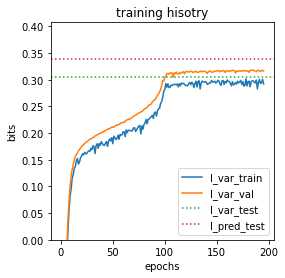

In [9]:
# Show training history
print('On test data:')

# Compute variational information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

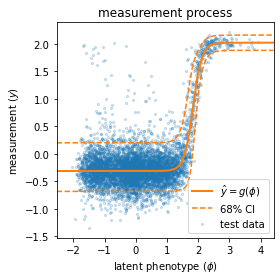

In [10]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

In [11]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()

,set,yhat,phi,y,x
0,training,-0.312178,-1.141249,-0.266805,CGAGCCGCC
1,training,-0.311873,0.509974,-0.503418,GUGGUCCAG
2,training,-0.312178,-0.891705,-0.146434,UCAGCUCGA
3,training,-0.312174,-0.181048,-0.389262,CUCGUCGCC
4,training,-0.312178,-1.166299,-0.083640,UGCGCCGAG


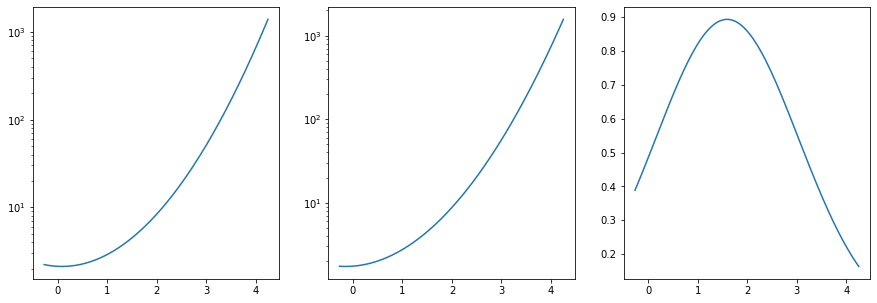

In [12]:
# Is clip by value causing a problem?
yhat_fixed = (yhat_grid - model.y_mean)/model.y_std
a, b, s = model.layer_noise_model.compute_params(yhat_fixed)

fig, axs = plt.subplots(1,3,figsize=[15,5])

axs[0].semilogy(yhat_fixed, a)
axs[1].semilogy(yhat_fixed, b)
axs[2].plot(yhat_fixed, s)